In [8]:
path = "https://raw.githubusercontent.com/shobhit-nigam/knowledgeclan/main/datasets/Housing.txt"


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
dfa = pd.read_table(path)
dfa.sample(6)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
259,260,907200280,20,RL,38.0,15240,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,150000
1263,1264,535426260,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
2567,2568,535105160,20,RL,85.0,8500,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,98600
2563,2564,534479240,60,RL,79.0,9462,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,137000
1243,1244,535180100,20,RL,75.0,9464,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,136000
2327,2328,527190050,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000


In [12]:
dfa

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [11]:
dfa['SalePrice'].sample(1, random_state = 0)

2216    220000
Name: SalePrice, dtype: int64

In [13]:
dfa['SalePrice'].mean()

180796.0600682594

In [14]:
dfa['SalePrice'].std()

79886.692356665

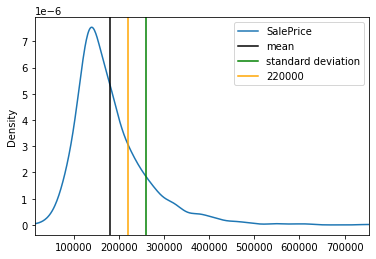

In [17]:
dfa['SalePrice'].plot.kde(xlim=(dfa['SalePrice'].min(), dfa['SalePrice'].max()))

std_dev = dfa['SalePrice'].std()
mean = dfa['SalePrice'].mean()

#plt.figure(figsize=(12,10))

plt.axvline(mean, color ='Black', label = 'mean')
plt.axvline(mean + std_dev, color = 'green', label = 'standard deviation')
plt.axvline(220000, color ='Orange', label = '220000')

plt.legend()
plt.show()


In [19]:
std_dev = dfa['SalePrice'].std()
mean = dfa['SalePrice'].mean()

distance = 220000 - mean
std_away = distance / std_dev

print(round(std_away, 4))

0.4907


In [20]:
# Std()
#ddof , 

In [48]:
min_val = dfa['SalePrice'].min()
max_val = dfa['SalePrice'].max()
mean_val = dfa['SalePrice'].mean()


def cal_z_score(val, arr, bessel = 0):
    mean = sum(arr)/len(arr)
    std_dev = np.std(arr, ddof=bessel)
    dist = val - mean
    z = dist/std_dev
    
    return round(z,4)

In [49]:
dfa['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [50]:
dfa['Neighborhood'].value_counts()[:5]

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
Name: Neighborhood, dtype: int64

In [51]:
list_locations = list(dict(dfa['Neighborhood'].value_counts()[:5]))

In [52]:
z_by_loc = {}

for loc in list_locations:
    z_by_loc[loc] = cal_z_score(200000, dfa[dfa['Neighborhood'] == loc]['SalePrice'], bessel = 0)
    

In [53]:
z_by_loc

{'NAmes': 1.724,
 'CollgCr': -0.0333,
 'OldTown': 1.7183,
 'Edwards': 1.4436,
 'Somerst': -0.5186}